<a href="https://colab.research.google.com/github/ZiyadAlmatrafi/Data-science/blob/master/ML/sec11/CART_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree
Using the same seattle weather data as last chapter develop a linear regression model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 

decision_tree_df = pd.DataFrame({'today':[0.0]*numrows,
                             'tomorrow':[True]*numrows})

#sort columns for convience
seq = ['today',
       'tomorrow']

decision_tree_df = decision_tree_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    decision_tree_df.iat[i,1] = tomorrow
    decision_tree_df.iat[i,0] = today

decision_tree_df = decision_tree_df.dropna() #exclude any rows with missing data

In [3]:
decision_tree_df.head()

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True


In [4]:
from sklearn import tree
#modify the data to work with this model
x = decision_tree_df.today.values
y = decision_tree_df.tomorrow.values
x = x.reshape(decision_tree_df.shape[0], 1)
#note that we did not need to reshape the y values as we did with linear regression

In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(x, y)

In [6]:
#we can calculate the accuarcy using score
score = clf.score(x,y)
print(score)

0.7129883347686526


In [7]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[11461  3183]
 [ 4149  6753]]


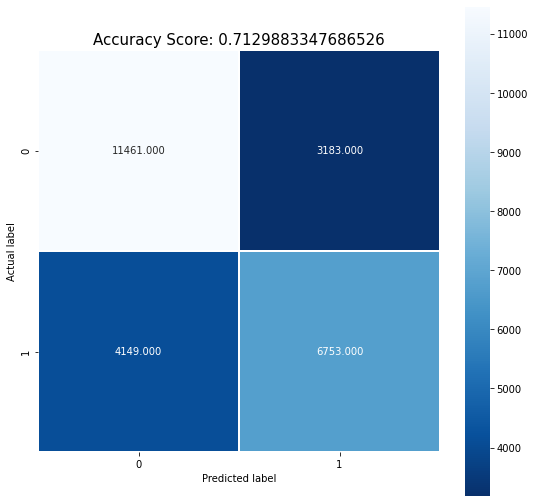

In [8]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [18]:
from sklearn.tree import plot_tree

tree.export_graphviz(clf,out_file='dt.dot',filled=True)

Open the file and paste the contents into the graph viz tool here: [here:](http://webgraphviz.com/)